### Assignment8 – High Frequency Words

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## 1. Choose a corpus of interest.

semcor
The Brown Corpus, annotated with WordNet senses.

In [427]:
from nltk.corpus import semcor
import nltk

In [428]:
WordNet = semcor.words('brown2/tagfiles/br-n12.xml')  # doctest: +ELLIPSIS

## 2. How many total unique words are in the corpus? 
define unique words in any interesting, defensible way

    a)  get a nominal count of words in the corpus
    b)  get statistics on word corpus 
    c)  filter out characters that don't represent words 

In [193]:
#keys in frequency distribution will give unique occurances of each distinct word type
len(nltk.FreqDist([w for w in WordNet]).keys())

727

In [527]:
#show sorted vocab list
sorted(nltk.FreqDist([w for w in WordNet]).keys())[:20]

['!',
 "'",
 "''",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 ',',
 '-',
 '.',
 ';',
 '?',
 'A',
 'About',
 'Adams',
 'Again',
 'All',
 'An']

In [430]:
#we need to account for duplication due to case
len(nltk.FreqDist([w.lower() for w in WordNet]).keys())

680

In [528]:
#show sorted vocab list
sorted(nltk.FreqDist([w.lower() for w in WordNet]).keys())[:20]

['!',
 "'",
 "''",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 ',',
 '-',
 '.',
 ';',
 '?',
 '``',
 'a',
 'about',
 'above',
 'across',
 'action']

### There are 659 unique words in the WordNet corpus

## 3. How many unique words represent half of the total words in the corpus?

    a)  analyze frequency distributions
    b)  get frequency for each distinct word length

In [431]:
#strip words containing non-alpha characters-there a no legit contractions in this corpus
len(nltk.FreqDist([w.lower() for w in WordNet if w.isalpha()]).keys())

659

In [529]:
sorted(nltk.FreqDist([w.lower() for w in WordNet if w.isalpha()]).keys())[:10]

['a',
 'about',
 'above',
 'across',
 'action',
 'adams',
 'add',
 'admit',
 'admitted',
 'advantage']

In [433]:
fdist = nltk.FreqDist([w.lower() for w in WordNet if w.isalpha()])
sorted(fdist.keys())
len(vocab)

659

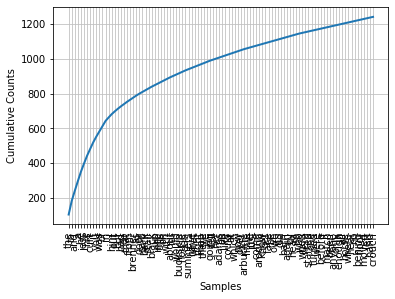

In [434]:
fdist.plot(100,cumulative=True)

In [435]:
#How many unique words represent half of the total words in the corpus?
#There are 1997 words with 659 are distinct occurances
threshold = round(len([w.lower() for w in WordNet if w.isalpha()])/2)
print(threshold)

998


In [437]:
'''Returns a dictionary of words mapped to how often they occur'''
word_frequencies = nltk.FreqDist([w.lower() for w in WordNet if w.isalpha()])
wc = 0
fc = 0
fw = ''
unique = 0
'''Sort the above result by the frequency of each word'''
sorted_counts = sorted(word_frequencies.items() , key = lambda x: x[1], reverse = True)
d = dict(sorted_counts)   
for k,v in d.items():
    wc = wc + v
    if wc < threshold:
        fc = v
        fw = k
        unique = unique + 1
print("The midpoint word is " + "'" + fw + "'", ' and corresponds to a  count of ', fc)
print('There are ' + str(unique) + ' unique words representing half the WordNet corpus.')

The midpoint word is 'tell'  and corresponds to a  count of  6
There are 48 unique words representing half the WordNet corpus.


### The midpoint word is 'tell'  and corresponds to a count of 6 words.
### There are 48 unique words representing half the WordNet corpus.

In [416]:
# index of "tell" in WordNet corpus
[w.lower() for w in WordNet if w.isalpha()].index('tell')

79

## 4. Identify the 200 highest frequency words in this corpus.

In [530]:
'''Returns a dictionary of words mapped to how often they occur'''
word_frequencies = nltk.FreqDist([w.lower() for w in WordNet if w.isalpha()])
wc = 0
fc = 0
fw = ''
unique = 0
'''Sort the above result by the frequency of each word'''
sorted_counts = sorted(word_frequencies.items() , key = lambda x: x[1], reverse = True)
d = dict(sorted_counts)   
for k,v in d.items():
    wc = wc + v
    if unique < 200:
        fc = v
        fw = k
        unique = unique + 1
    if unique < 10:
        print("The # " + str(unique) + " unique word is " + "'" + fw + "'", ' and corresponds to a  count of ', fc)

The # 1 unique word is 'the'  and corresponds to a  count of  104
The # 2 unique word is 'to'  and corresponds to a  count of  79
The # 3 unique word is 'and'  and corresponds to a  count of  58
The # 4 unique word is 'a'  and corresponds to a  count of  56
The # 5 unique word is 'he'  and corresponds to a  count of  54
The # 6 unique word is 'jess'  and corresponds to a  count of  47
The # 7 unique word is 'his'  and corresponds to a  count of  45
The # 8 unique word is 'curt'  and corresponds to a  count of  39
The # 9 unique word is 'it'  and corresponds to a  count of  38


## 5. Create a graph that shows the relative frequency of these 200 words.

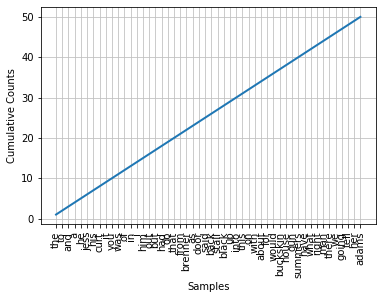

In [506]:
'''Returns a top 200 dictionary of words mapped to how often they occur'''
word_frequencies = nltk.FreqDist(w.lower() for w in WordNet if w.isalpha())
top200 = word_frequencies.most_common(200)
#won't plot w/o reverse engineering to frequency distribution--must be simpler way
nltk.FreqDist(list(dict(top200).keys())).plot(50,cumulative=True)

## 6. Does the observed relative frequency of these words follow Zipf’s law? 
reference link:
https://stats.stackexchange.com/questions/331219/characterizing-fitting-word-count-data-into-zipf-power-law-lognormal
https://en.wikipedia.org/wiki/Zipf%27s_law

    Based on the plot below, there are high frequency word counts and the negative slope of this line 
    roughly corresponds to Zipf's law.  Paraphrased from the Wikipedia entry . . .

###### given some corpus of natural language utterances, the frequency of any word is inversely proportional 
    to its rank in the frequency table. Thus the most frequent word will occur approximately twice 
    as often as the second most frequent word, three times as often as the third most frequent word, 
    etc.: the rank-frequency distribution is an inverse relation.

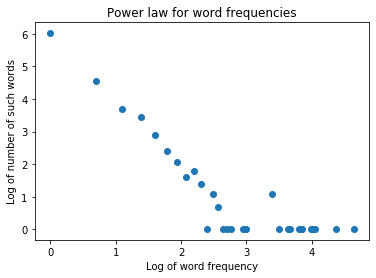

In [520]:
import nltk.corpus
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
# substituted The Brown Corpus
counter_of_words = Counter([w.lower() for w in WordNet if w.isalpha()])
counter_of_counts = Counter(counter_of_words.values())
word_counts = np.array(list(counter_of_counts.keys()))
freq_of_word_counts = np.array(list(counter_of_counts.values()))
plt.scatter(np.log(word_counts), np.log(freq_of_word_counts))
plt.xlabel('Log of word frequency')
plt.ylabel('Log of number of such words')
plt.title('Power law for word frequencies')
plt.show();

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words          in all corpora.”

    *semcor.words('brown2/tagfiles/br-n12.xml')  # doctest: +ELLIPSIS* is a subset of the Brown Univesity 
    WordNet corpus which is derived from a library of texts.  If its a representative random sample, 
    my sense is that this corpus follows more formal rules for written English as opposed to all corpora 
    which may tend to follow more relaxed rules.  My presumption is that less formal English rhetoric will
    have fewer words used with greater frequency of use.  Therefore the Zipf curve I believe would be steeper
    with a smaller spread of low use words at the bottom of the plot.